#Step 1: Import necessary libraries
###The implementation requires to import numpy, sklearn, FastICA and matplotlib.



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy import signal

#Step 2: Generate Random Data and Mix the Signals

Random seed is set to generate random numbers.

Samples and Time parameters are defined.

Synthetic signals are generated and then combined to single matrix “S”.
Noise is added to each element of the matrix.

Matrix “A” is defined with coefficients the represent how the original signals are combined to form observed signals.

The observed signals are obtained by multiplying the matrix “S” by the transpose of the mixing matrix “A”.


In [11]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]



#Add nois
S += 0.2 * np.random.normal(size=S.shape)



# Mixing matrix
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])

X = np.dot(S, A.T)


#Step 3: Apply ICA to unmix the signals
#In the following code snippet,



*   An instance of FastICA class is created and number of independent components are set to 3.

*   Fast ICA algorithm is applied to the observed mixed signals ‘X’. This fits the model to the data and transforms the data to obtain the estimated independent sources (S_).





In [14]:
# Estimated sources
ica = FastICA(n_components=3)
  # Reconstruct signals
S_ = ica.fit_transform(X)
# Get estimated mixing matrix
A_ = ica.mixing_


# Step 4: Visualize the signals


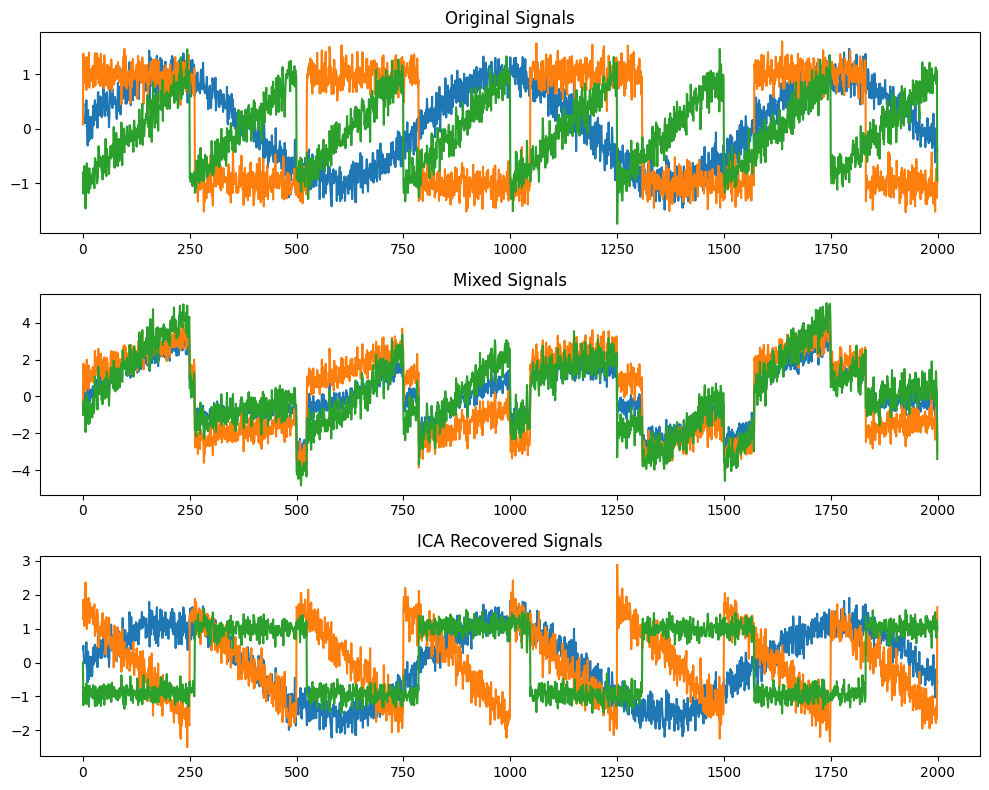

In [15]:
# Plot the results
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.title('Original Signals')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Mixed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('ICA Recovered Signals')
plt.plot(S_)

plt.tight_layout()
plt.show()


